In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
num_pretrain_entities = np.load("num_pretrain_entities/bios_test_points_medium.npy")
num_entities_bins = np.array([0, 200, 400, 600, 800, 1000, np.inf])

In [3]:
def get_factscore_info(factscores):
    num_true_all = []
    num_total_all = []
    frac_correct_facts = []
    for i in range(len(factscores["decisions"])):
        decison = factscores["decisions"][i]
        if decison == None:
            num_total_all.append(0)
            num_true_all.append(0)
            frac_correct_facts.append(0)
            print("None")
        else:
            num_total_all.append(len(decison))
            num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))
            frac_correct_facts.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
    num_total_all = np.array(num_total_all)
    num_true_all = np.array(num_true_all)
    frac_correct_facts = np.array(frac_correct_facts)
    num_false_all = num_total_all - num_true_all
    return num_total_all, num_true_all, num_false_all, frac_correct_facts

In [4]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json") as f:
    factscores = json.load(f)

sft_num_total_all, sft_num_true_all, sft_num_false_all, sft_frac_correct_facts = get_factscore_info(factscores)

In [17]:
np.mean(sft_frac_correct_facts)

0.47067468253968253

In [5]:
with open("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5/checkpoint_017000/hf_model/factscores_test_medium.json", "r") as f:
    factscores = json.load(f)

ppo_num_total_all, ppo_num_true_all, ppo_num_false_all, ppo_frac_correct_facts = get_factscore_info(factscores)

None
None
None
None


In [18]:
np.mean(ppo_frac_correct_facts)

0.5876689682539683

In [6]:
with open("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5_GPT3pt5/checkpoint_006000/hf_model/factscores_test_medium.json", "r") as f:
    factscores = json.load(f)

ppo_num_total_all2, ppo_num_true_all2, ppo_num_false_all2, ppo_frac_correct_facts2 = get_factscore_info(factscores)

In [19]:
np.mean(ppo_frac_correct_facts2)

0.5043549639249639

In [7]:
def get_bin_mean(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
    return np.array(bin_avgs)

def get_bin_median(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        bin_avgs.append(np.median(y_axis[idxs]))
    return np.array(bin_avgs)

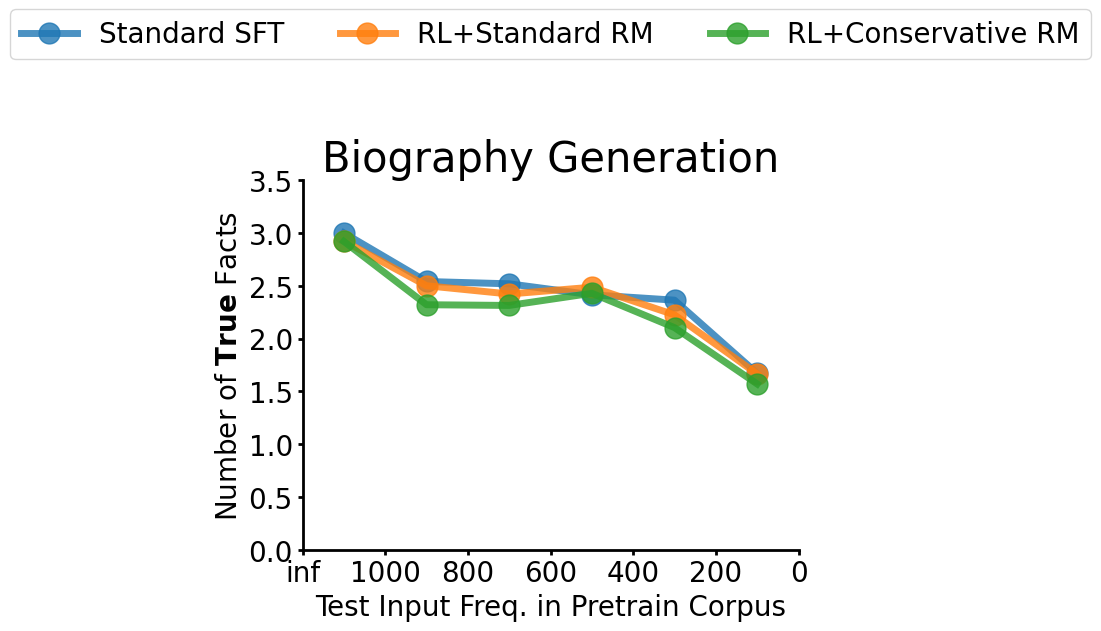

In [16]:
x= np.arange(0, len(num_entities_bins)-1, 1)

sft_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, sft_num_true_all, num_entities_bins))
ppo_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_true_all, num_entities_bins))
ppo_bin_avgs2 = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_true_all2, num_entities_bins))
plt.plot(x, sft_bin_avgs, "o-", label="Standard SFT", markersize=15, linewidth=5, alpha=0.8)
plt.plot(x, ppo_bin_avgs2, "o-",label="RL+Standard RM", markersize=15, linewidth=5, alpha=0.8)
plt.plot(x, ppo_bin_avgs, "o-",label="RL+Conservative RM", markersize=15, linewidth=5, alpha=0.8)


plt.ylim(0, 3.5)

plt.yticks(fontsize=20)
plt.xlabel("Test Input Freq. in Pretrain Corpus", fontsize=20)
plt.ylabel("Number of $\mathbf{True}$ Facts", fontsize=20)
plt.xticks(np.append(x,len(num_entities_bins)-1 )-0.5, ["inf", 1000, 800, 600, 400, 200, 0], fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Biography Generation", fontsize=30)

# add legend to top
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.5), ncol=3, fontsize=20)

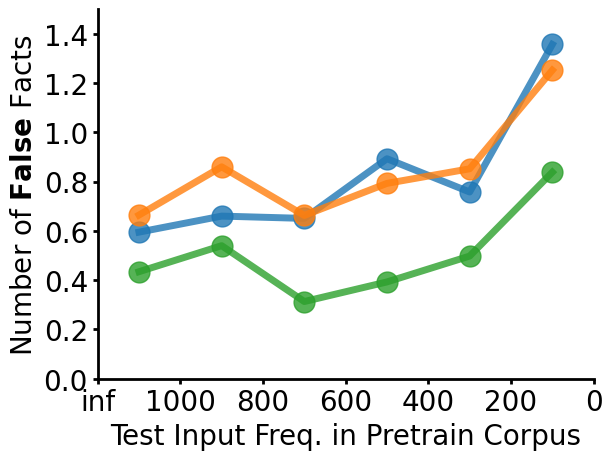

In [12]:
x= np.arange(0, len(num_entities_bins)-1, 1)

sft_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, sft_num_false_all, num_entities_bins))
ppo_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_false_all, num_entities_bins))
ppo_bin_avgs2 = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_false_all2, num_entities_bins))
plt.plot(x, sft_bin_avgs, "o-", label="SFT", markersize=15, linewidth=5, alpha=0.8)
plt.plot(x, ppo_bin_avgs2, "o-",label="RL w/ GPT3.5 RM", markersize=15, linewidth=5, alpha=0.8)
plt.plot(x, ppo_bin_avgs, "o-",label="RL w/ llama2 7B RM", markersize=15, linewidth=5, alpha=0.8)


plt.ylim(0, 1.5)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Number of $\mathbf{False}$ Facts", fontsize=20)
plt.xlabel("Test Input Freq. in Pretrain Corpus", fontsize=20)
plt.xticks(np.append(x,len(num_entities_bins)-1 )-0.5, ["inf", 1000, 800, 600, 400, 200, 0], fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.title("Biography Generation", fontsize=20)

In [67]:
# x= np.arange(0, len(num_entities_bins)-1, 1)*4


# y = np.flip(get_bin_mean(num_pretrain_entities, sft_num_total_all, num_entities_bins))
# plt.bar(x, y, hatch="x")
# y = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_total_all2, num_entities_bins))
# plt.bar(x+1, y,  hatch="x")
# y = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_total_all, num_entities_bins))
# plt.bar(x+2, y, hatch="x")



# y = np.flip(get_bin_mean(num_pretrain_entities, sft_num_true_all, num_entities_bins))
# plt.bar(x, y, )
# y = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_true_all2, num_entities_bins))
# plt.bar(x+1, y,)
# y = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_true_all, num_entities_bins))
# plt.bar(x+2, y,)
